In [11]:
###################################################
### This file is part of numsimqubits.          ###
###                                             ###    
### Copyright (c) 2020 and later, Andras Gyenis ###
### All rights reserved.                        ###
###################################################

# Importing packages, modules.

import sys
import numpy as np
sys.path.append('../')

%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Image, Markdown

import numsimqubits.qubits as nsq
from matplotlib.ticker import AutoMinorLocator
from qutip import Qobj

import numsimqubits.qubits.settings as sim_settings
sim_settings.update()

In [2]:
# Create a transmon_phase object in phase basis.
transmon_phase = nsq.Transmon(                      
                              E_J          = 15,                         # Josephson energy [GHz]
                              E_C          = 0.25,                       # charging energy [GHz]
                              n_gate       = 0.,                         # gate voltage
                              n_gate_ls    = np.linspace(-0.5, 0.5, 51), # gate voltages to sweep
                              keig         = 20,                         # number of states to calculate
                              charge_basis = [False],                    # the qubit is defined in phase space
                              dims         = [101],                      # number of points in phase space                          
                              beta         = [0.1],                      # coupling constant for a coupled transmon-resonator case
                              f_resonator  = 7.                          # frequency of the coupled resonator [GHz]
                             )

# Create a transmon_charge object in charge basis.
transmon_charge = nsq.Transmon(                      
                              E_J          = 15,                         # Josephson energy [GHz]
                              E_C          = 0.25,                       # charging energy [GHz]
                              n_gate       = 0.,                         # gate voltage
                              n_gate_ls    = np.linspace(-0.5, 0.5, 51), # gate voltages to sweep
                              keig         = 20,                         # number of states to calculate
                              charge_basis = [True],                     # the qubit is defined in charge space
                              dims         = [101],                      # number of points in phase space                          
                              beta         = [0.1],                      # coupling constant for a coupled transmon-resonator case
                              f_resonator  = 7.                          # frequency of the coupled resonator [GHz]
                             )


In [3]:
# Diagonalize the Hamiltonian in charge and phase basis as a function of 'n_gate' variable.

transmon_phase.sweep_diagonalize(sweep_variable='n_gate')
transmon_charge.sweep_diagonalize(sweep_variable='n_gate')

100%|██████████| 51/51 [00:00<00:00, 87.37it/s]


<IPython.core.display.Javascript object>


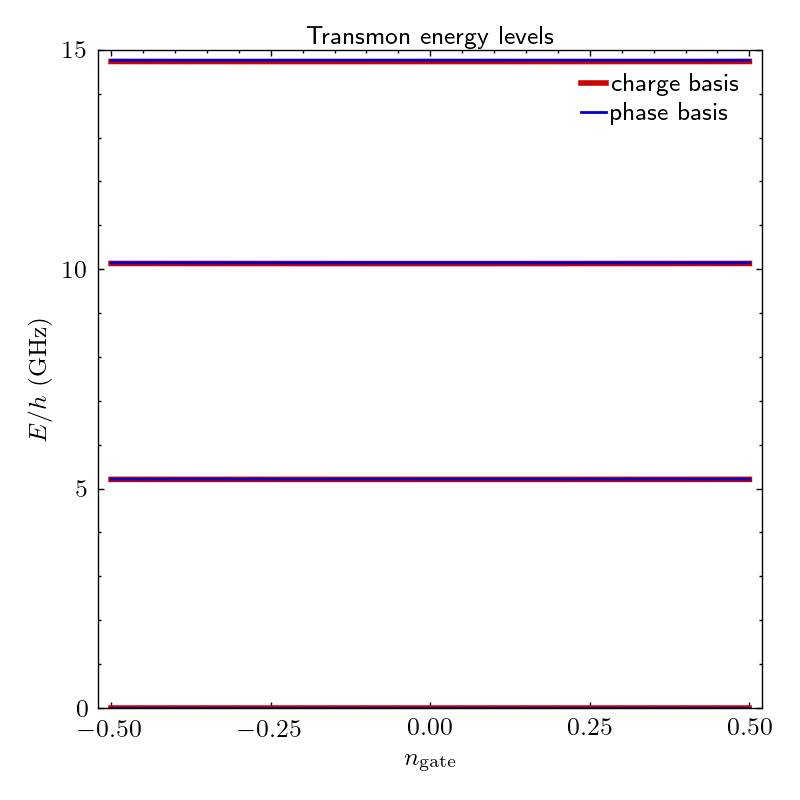

In [4]:
# Plot the energy disperion based on both the charge and phase representation.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(transmon_phase.n_gate_ls, transmon_phase.evals[:,level_idx], 
                   linewidth=2.0, color=[0.8,0,0], label='charge basis')
    ln2, = ax.plot(transmon_charge.n_gate_ls, transmon_charge.evals[:,level_idx], 
                   linewidth=1.0, color=[0,0,0.8], label='phase basis')

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([0, 10])
ax.set_yticks([0,5,10,15])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title('Transmon energy levels')
ax.legend(handles = [ln1, ln2])

plt.tight_layout()
plt.show()

### Comparing numerical solution with analytical - energy levels

From *Koch et. al.* [Phys. Rev. A __76__, 042319 (2007)], we know that in the deep transmon regime ($E_J/E_C\rightarrow\infty$), the qubit spectrum can be approximated as:

\begin{equation}
E_{01}^\mathrm{analytical} = \sqrt{8E_CE_J} -E_C \\
E_{21}^\mathrm{analytical} = E_{01}^\mathrm{analytical} -E_C
\end{equation}

In [5]:
E01 = np.sqrt(8 * transmon_phase.E_C * transmon_phase.E_J) - transmon_phase.E_C
E02 = 2 * E01 - transmon_phase.E_C

<IPython.core.display.Javascript object>


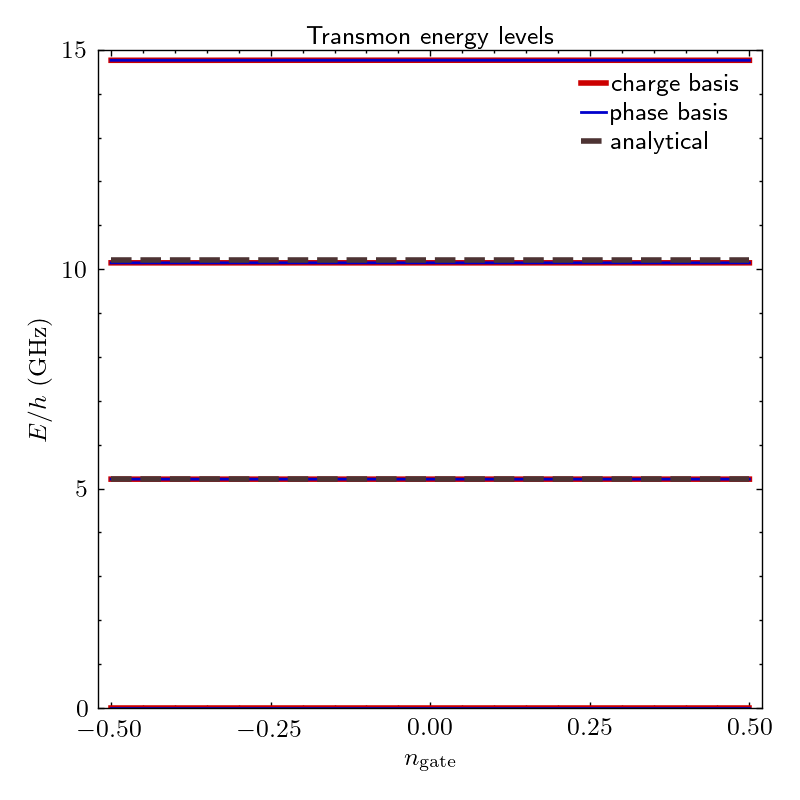

In [6]:
# Plot the energy disperion based on both the charge and phase representation and compare it with analytical solution.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(transmon_phase.n_gate_ls, transmon_phase.evals[:,level_idx], 
                   linewidth=2.0, color=[0.8,0,0], label='charge basis')
    ln2, = ax.plot(transmon_charge.n_gate_ls, transmon_charge.evals[:,level_idx], 
                   linewidth=1.0, color=[0,0,0.8], label='phase basis')

ln3, = ax.plot([transmon_phase.n_gate_ls[0], transmon_phase.n_gate_ls[-1]], 
               [E01, E01], linewidth=2, linestyle='--', color=[0.3,0.2,0.2], label='analytical')    
ln3, = ax.plot([transmon_phase.n_gate_ls[0], transmon_phase.n_gate_ls[-1]], 
               [E02, E02], linewidth=2, linestyle='--', color=[0.3,0.2,0.2], label='analytical')    
    
ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([0, 10])
ax.set_yticks([0,5,10,15])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title('Transmon energy levels')
ax.legend(handles = [ln1, ln2, ln3])

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


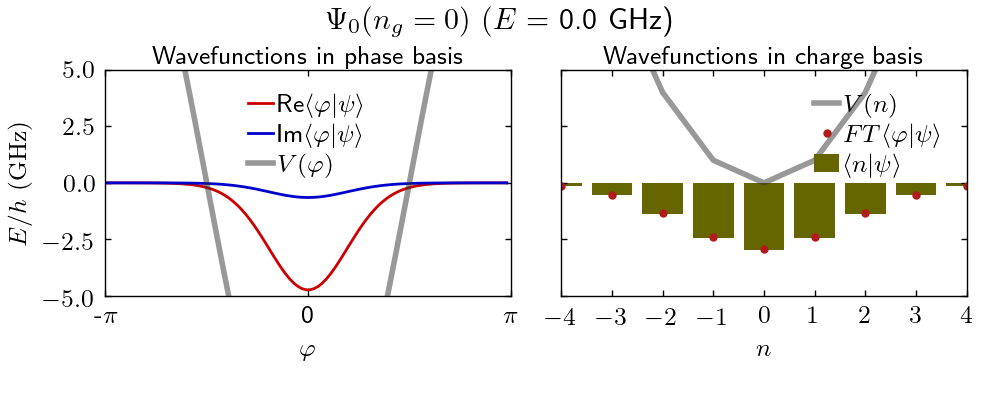

In [7]:
# Plot the wavefunction at a certain offset charge value in phase and charge space.

n_level                = 0 # energy level
transmon_phase.n_gate  = 0 # offset charge
transmon_charge.n_gate = 0 # offset charge

results_phase  = transmon_phase.diagonalize()
results_charge = transmon_charge.diagonalize()

axis_phase     = transmon_phase.axis[0]
axis_charge    = transmon_charge.axis[0]

energy           = results_phase['evals'][n_level]
eket_phase       = results_phase['ekets'][n_level]
eket_charge      = results_charge['ekets'][n_level]
potential_phase  = results_phase['V']
potential_charge = results_charge['V']

fft            = transmon_charge.fourier_operator()
eket_phase_fft = np.dot(fft, eket_phase)               

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5,2), sharey=True)

# Plot wavefunctions in phase basis
ln1, = axs[0].plot(axis_phase ,  np.real(eket_phase) * 20, 
            linewidth = 1.0, color=[0.8,0,0], 
            label=r'Re$\langle\varphi|\psi\rangle$')
ln2, = axs[0].plot(axis_phase , np.imag(eket_phase) * 20, 
            linewidth = 1.0, color=[0,0,0.8], 
            label=r'Im$\langle\varphi|\psi\rangle$')
ln3, = axs[0].plot(axis_phase, potential_phase, 
            linewidth = 2, color = [0.2,0.2,0.2], alpha = 0.5, 
            label=r'$V(\varphi)$')

axs[0].set_xlim([-np.pi, np.pi])
axs[0].set_xticks([-np.pi, 0, np.pi])
axs[0].set_xticklabels([r"-${\pi}$", "0", r"${\pi}$"])
axs[0].set_xlabel(r'$\varphi$')

axs[0].set_ylim([-20, 20])
axs[0].set_ylabel(r'$E/h\ (\mathrm{GHz})$')
axs[0].legend(handles = [ln1, ln2, ln3])

axs[0].set_title('Wavefunctions in phase basis')

# Plot wavefunctions in charge basis
axs[1].plot(axis_charge, potential_charge, linewidth = 2, 
           color=[0.2,0.2,0.2], alpha = 0.5)

axs[1].bar(axis_charge, np.real(eket_charge) * 5, color=[0.4,0.4,0])

# Plot the Fourier transform of the wavefunction in phase basis
axs[1].plot(axis_charge, np.real(eket_phase_fft) * 5, 'o', markersize = 2, color = [0.7,0.1,0.1])

axs[1].set_xlim([-4, 4])
axs[1].set_xticks(np.arange(-4,5))
axs[1].set_xlabel(r'$n$')
axs[1].set_ylim([-5, 5])
axs[1].legend([r'$V(n)$', r'$FT\langle \varphi|\psi\rangle$', r'$\langle n|\psi\rangle$'])

axs[1].set_title('Wavefunctions in charge basis')

fig.suptitle(r'$\Psi_{%s}(n_g = %s) \ (E$ = %s GHz)' %(n_level, transmon_phase.n_gate, np.round(energy,3)))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:
# Diagonalize the Hamiltonian in charge and phase basis as a function of 'n_gate' variable, 
# and obtain the `n` matrix elements and the `g` coupling rates.

transmon_phase.sweep_diagonalize(sweep_variable='n_gate', calculate_mx_elements=True)
transmon_charge.sweep_diagonalize(sweep_variable='n_gate', calculate_mx_elements=True)

100%|██████████| 51/51 [00:00<00:00, 54.75it/s]


<IPython.core.display.Javascript object>


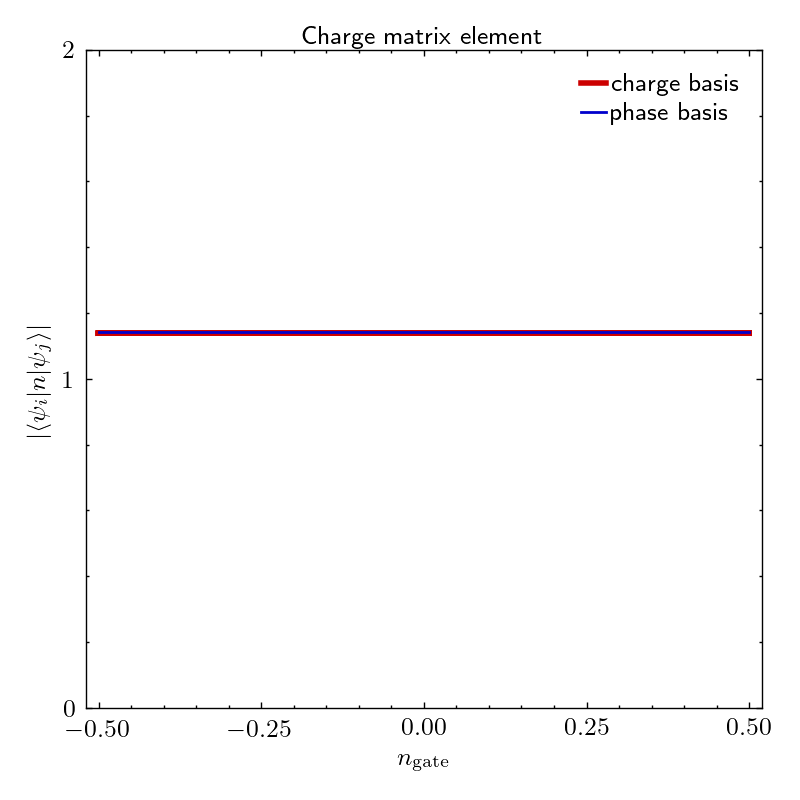

In [5]:
# Plot the matrix element between level i and j at a given gate value.

idx_level_i = 0 # energy level i
idx_level_j = 1 # energy level j
n_gate  = 0 # gate value 

# find index in self.n_gate_ls corresponding to n_gate
idx_n_gate   = np.argmin(np.abs(n_gate - transmon_phase.n_gate_ls)) 

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(transmon_phase.n_gate_ls, np.abs(transmon_phase.n[:,idx_level_i,idx_level_j]), 
                   linewidth=2.0, color=[0.8,0,0], label='charge basis')
    ln2, = ax.plot(transmon_charge.n_gate_ls, np.abs(transmon_charge.n[:,idx_level_i,idx_level_j]), 
                   linewidth=1.0, color=[0,0,0.8], label='phase basis')

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([0, 2])
ax.set_yticks([0,1,2])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$|\langle\psi_i|n|\psi_j\rangle|$')

ax.set_title('Charge matrix element')
ax.legend(handles = [ln1, ln2])

plt.tight_layout()
plt.show()

### Comparing numerical solution with analytical - coupling rates

From *Koch et. al.* [Phys. Rev. A __76__, 042319 (2007)], we know that in the deep transmon regime ($E_J/E_C\rightarrow\infty$), the qubit coupling rates can be approximated as:

\begin{equation}
g_{01}/2\pi=0.125\beta\frac{1}{\sqrt{2}}\left(\frac{E_J}{8E_C}\right)^{1/4}\cdot\omega_r/2\pi, \\
g_{12}= \sqrt{2}g_{01}
\end{equation}

In [11]:
g01 = 0.125 * transmon_phase.beta[0] / np.sqrt(2) * ( transmon_phase.E_J / transmon_phase.E_C / 8 ) ** 0.25 * transmon_phase.f_resonator
g12 = np.sqrt(2) * g01

<IPython.core.display.Javascript object>


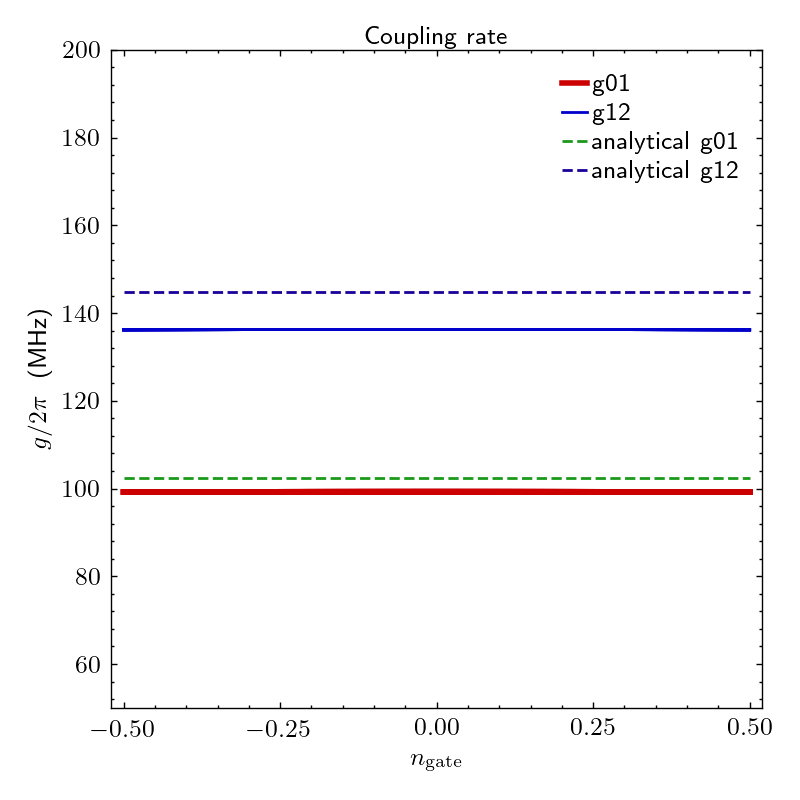

In [12]:
# Plot the coupling rates between levels (0,1) and (1,2) at a given gate value, 
# and compare it with analytical predictions.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(transmon_phase.n_gate_ls, np.abs(transmon_phase.g[:,0,1]*1e3), 
                   linewidth=2.0, color=[0.8,0,0], label='g01')
    ln2, = ax.plot(transmon_phase.n_gate_ls, np.abs(transmon_phase.g[:,1,2]*1e3), 
                   linewidth=1.0, color=[0,0,0.8], label='g12')

ln3, = ax.plot([transmon_phase.n_gate_ls[0], transmon_phase.n_gate_ls[-1]], [g01*1e3, g01*1e3], linewidth=1, linestyle='--', color=[0.1,0.6,0.1], label='analytical g01')    
ln4, = ax.plot([transmon_phase.n_gate_ls[0], transmon_phase.n_gate_ls[-1]], [g12*1e3, g12*1e3], linewidth=1, linestyle='--', color=[0.1,0.,0.6], label='analytical g12')    

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([50, 200])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$g/2\pi\ $ (MHz)')

ax.set_title('Coupling rate')
ax.legend(handles = [ln1, ln2, ln3, ln4])

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


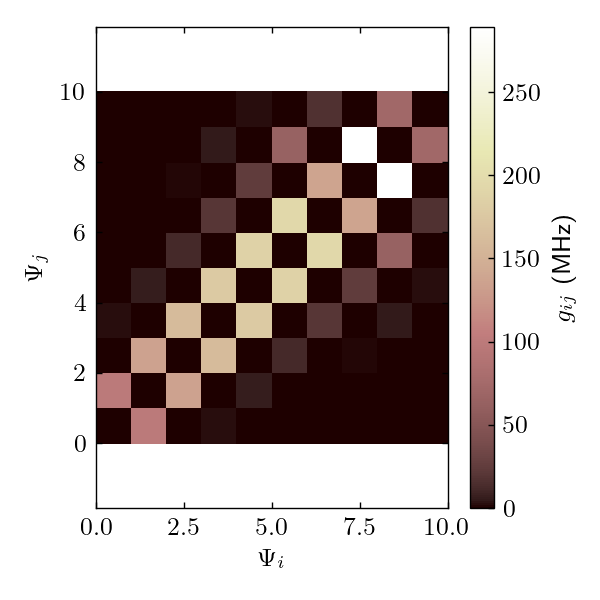

In [6]:
# Plot the coupling rates as function of level indices.

transmon_phase.n_gate  = 0 # offset charge

results_phase  = transmon_phase.diagonalize(calculate_mx_elements=True)

g_matrix = results_phase['g']


fig, ax = plt.subplots(figsize=(3,3))

im = plt.pcolor(np.abs(g_matrix)[0:10,0:10]*1e3, cmap='pink')
cbar = fig.colorbar(im)

ax.set_xlabel(r'$\Psi_i$')
ax.set_ylabel(r'$\Psi_j$')
cbar.set_label('$g_{ij}$ (MHz)')

plt.axis('equal')
plt.tight_layout()
plt.show()




In [12]:
# Plot the wavefunction at a certain flux and charge value
n_level_a            = 1 # energy level
n_level_b            = 0 # energy level
transmon_phase.ngate = 0. # external flux

results     = transmon_phase.diagonalize(calculate_mx_elements=True)
energy_a    = results['evals'][n_level_a]
energy_b    = results['evals'][n_level_b]
energy      = np.abs(energy_a - energy_b)
g           = np.abs(results['g'][n_level_a][n_level_b])
chi         = np.abs(results['chi'][n_level_a]-results['chi'][n_level_b])

display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_a, energy_a)))
display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_b, energy_b)))
display(Markdown('$\Delta\omega/2\pi = $ %.3f MHz' % (energy*1e3)))
display(Markdown('$g_{%s%s}/2\pi = $ %.3f MHz' % (n_level_a, n_level_b, g*1e3)))
display(Markdown('$\chi_{%s%s}/2\pi = $ %.2f MHz' % (n_level_a, n_level_b,chi*1e3)))

$\omega_{1}/2\pi = $ 5.208 GHz

$\omega_{0}/2\pi = $ 0.000 GHz

$\Delta\omega/2\pi = $ 5208.027 MHz

$g_{10}/2\pi = $ 99.278 MHz

$\chi_{10}/2\pi = $ 2.02 MHz

In [7]:
# Diagonalize the coupled Hamiltonian and resonator in phase basis as a function of 'n_gate' variable.
transmon_phase.sweep_diagonalize_full_Hamiltonian('n_gate')


100%|██████████| 51/51 [00:01<00:00, 46.85it/s]


<IPython.core.display.Javascript object>


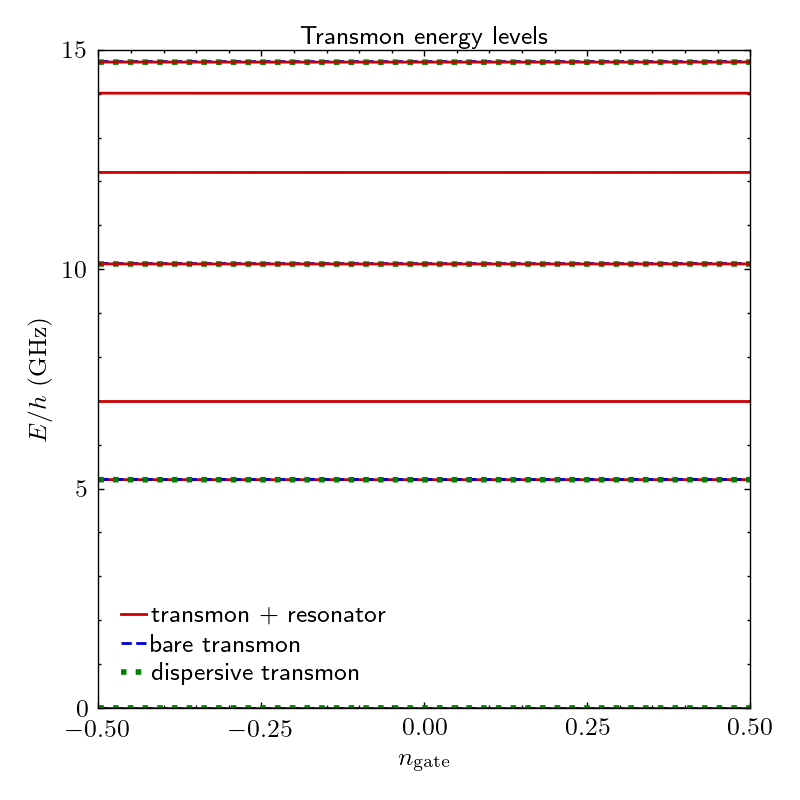

In [8]:
# Plot and compare the energy levels obtained from the bare transmon Hamiltonian,
# the dispersive Hamiltonian, and the full coupled transmon + resonator Hamiltonian.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(transmon_phase.n_gate_ls, transmon_phase.evals_full[:,level_idx], 
                   '-', linewidth=1.0, color = [0.8,0,0], label = 'transmon + resonator')
    ln2, = ax.plot(transmon_phase.n_gate_ls, transmon_phase.evals[:,level_idx], 
                   '--', linewidth=1.0, color = [0,0,0.8], label = 'bare transmon')
    ln3, = ax.plot(transmon_phase.n_gate_ls, transmon_phase.evals[:,level_idx] + transmon_phase.kappa[:,level_idx], 
                   ':', linewidth=2.0, color = [0,0.5,0], label = 'dispersive transmon')

ax.set_xlim([-0.5, 0.5])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([0, 15])
ax.set_yticks([0,5,10,15])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title('Transmon energy levels')

ax.legend(handles = [ln1, ln2, ln3])

plt.tight_layout()
plt.show()

### Comparing numerical solution with analytical - dispersive shifts

In the deep transmon regime ($E_J/E_C\rightarrow\infty$), the qubit dispersive shifts can be approximated as $\chi=(\chi_1-\chi_0)/2\approx -g^2\frac{E_C}{\Delta(\Delta-E_C)}$, where the detuning is $\Delta=E_1-E_0-\omega_r/2\pi$.

In [19]:
# Analytical
E01    = np.sqrt(8 * transmon_phase.E_C * transmon_phase.E_J) - transmon_phase.E_C
g01    = 0.125 * transmon_phase.beta[0] / np.sqrt(2) * ( transmon_phase.E_J / transmon_phase.E_C / 8 ) ** 0.25 * transmon_phase.f_resonator
delta  = E01 - transmon_phase.f_resonator
chi_an = -g01 ** 2 * transmon_phase.E_C / delta / (delta - transmon_phase.E_C)

# Numerical
transmon_phase.ngate = 0. # gate value 

results = transmon_phase.diagonalize(calculate_mx_elements=True)
chi_num = np.abs(results['chi'][0]-results['chi'][1]) / 2

print('Analytical dispersive shift: {:.1f} MHz'.format(chi_an * 1e3))
print('Numerical dispersive shift: {:.1f} MHz'.format(chi_num * 1e3))


Analytical dispersive shift: -0.7 MHz
Numerical dispersive shift: 1.0 MHz
